In [714]:
import pandas as pd

stock_houses = pd.read_csv("../../Downloads/stock_house1.csv") 
planning_permissions = pd.read_csv("../../Downloads/planning_permissions.csv") 
dwelling_completions = pd.read_csv("../../Downloads/Dwellings_completions.csv")
dwelling_total =  pd.read_csv("../../Downloads/Dwellings_comp_total.csv")
stock_houses = stock_houses.astype(int)

planning_permissions.reset_index(drop=True, inplace=True)
planning_permissions = planning_permissions.dropna(how = 'all') 
planning_permissions["Period"]= planning_permissions["Period"].fillna(" ")
planning_permissions.rename(
    columns={
        "Annual %\nchange.1": "Anual change % (Q1)",
        "Annual %\nchange.2": "Anual change % (Q2)",
        "Annual %\nchange.3": "Anual change % (Q3)",
        "Annual %\nchange.4": "Anual change % (Q4)",
        "Unnamed: 1": "Quarters",
        
    },
    inplace=True
)



In [715]:
#remove header from columns
dwelling_completions.columns = dwelling_completions.iloc[0]

In [716]:
dwelling_completions = dwelling_completions.drop(0)

In [717]:
planning_permissions = planning_permissions.drop([planning_permissions.columns[10]], axis='columns')
planning_permissions = planning_permissions.drop(planning_permissions.index[4])
planning_permissions = planning_permissions.drop(planning_permissions.index[8])

In [718]:

planning_permissions.reset_index(drop=True)

,Period,Quarters,All Houses,Annual % change,of which Multi- Development Houses,Anual change % (Q1),of which One-off houses,Anual change % (Q2),Apartments,Anual change % (Q3),Total Dwellings (All Houses & Apartments),Anual change % (Q4)
0,2017,Q1,3754.0,0.48100,2481.0,0.59400,1273.0,0.30200,896.0,0.60800,4650.0,0.50400
1,,Q2,3630.0,0.55100,2382.0,0.76400,1248.0,0.26100,823.0,0.02700,4453.0,0.41800
2,,Q3,3764.0,-0.13900,2382.0,-0.26300,1382.0,0.22400,975.0,-0.32900,4739.0,-0.18000
3,,Q4,4292.0,0.32300,2970.0,0.40600,1322.0,0.16700,2642.0,1.43700,6934.0,0.60200
4,2018,Q11,5758.0,0.53000,4367.0,0.76000,1391.0,0.09300,1867.0,1.08000,7625.0,0.64000
5,,Q2,4951.0,0.36400,3636.0,0.52600,1315.0,0.05400,1826.0,1.21900,6777.0,0.52200
6,,Q3,4879.0,0.29600,3463.0,0.45380,1416.0,0.02460,3139.0,2.21948,8018.0,0.69200
7,,Q4,4376.0,0.01957,3017.0,0.01582,1359.0,0.02798,2306.0,-0.12700,6682.0,-0.03634
8,2019,Q1,4901.0,-0.15000,3445.0,-0.21000,1456.0,0.04670,2592.0,0.39000,7493.0,-0.03500
9,,Q2,4936.0,0.00000,3549.0,-0.02300,1387.0,0.05470,4675.0,1.56000,9611.0,0.41800


In [719]:
dwelling_total.columns = dwelling_total.iloc[0]
dwelling_total = dwelling_total.drop(0)
dwelling_total_list = dwelling_total.iloc[0,1:10].astype(int).tolist()


In [720]:
dwelling_total = dwelling_total.drop(columns='2019Q4')

In [704]:
planning_permissions = planning_permissions.reset_index(drop=True)
planning_permissions_total = planning_permissions['Apartments'][0:9].astype(int).tolist()


In [706]:
total_plan_cons = planning_permissions.iloc[0:9,10].astype(int).tolist()

In [707]:

frame = { 'Total permissions': total_plan_cons, 'of wich Dwellings/apart.':planning_permissions_total, 'Total completion':dwelling_total_list} 
  
result = pd.DataFrame(frame) 

In [708]:
result

,Total permissions,of wich Dwellings/apart.,Total completion
0,4650,896,2767
1,4453,823,3266
2,4739,975,3773
3,6934,2642,4558
4,7625,1867,3469
5,6777,1826,4400
6,8018,3139,4638
7,6682,2306,5445
8,7493,2592,4256


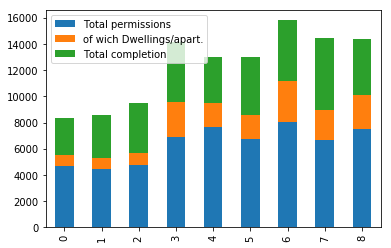

In [709]:
import matplotlib.pyplot as plt 
result.plot(kind='bar', stacked=True)
plt.show() 
